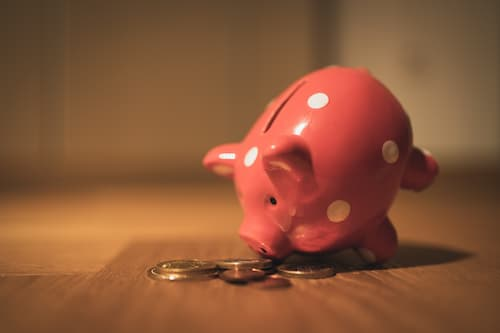

Personal loans are a lucrative revenue stream for banks. The typical interest rate of a two-year loan in the United Kingdom is 
around 10%
. This might not sound like a lot, but in September 2022 alone UK consumers borrowed 
around £1.5 billion
, which would mean approximately £300 million in interest generated by banks over two years!

You have been asked to work with a bank to clean the data they collected as part of a recent marketing campaign, which aimed to get customers to take out a personal loan. They plan to conduct more marketing campaigns going forward so would like you to ensure it conforms to the specific structure and data types that they specify so that they can then use the cleaned data you provide to set up a PostgreSQL database, which will store this campaign's data and allow data from future campaigns to be easily imported.

They have supplied you with a csv file called "bank_marketing.csv", which you will need to clean, reformat, and split the data, saving three final csv files. Specifically, the three files should have the names and contents as outlined below:

Personal loans are a lucrative revenue stream for banks. The typical interest rate of a two-year loan in the United Kingdom is 
around 10%
. This might not sound like a lot, but in September 2022 alone UK consumers borrowed 
around £1.5 billion
, which would mean approximately £300 million in interest generated by banks over two years!

You have been asked to work with a bank to clean the data they collected as part of a recent marketing campaign, which aimed to get customers to take out a personal loan. They plan to conduct more marketing campaigns going forward so would like you to ensure it conforms to the specific structure and data types that they specify so that they can then use the cleaned data you provide to set up a PostgreSQL database, which will store this campaign's data and allow data from future campaigns to be easily imported.

They have supplied you with a csv file called "bank_marketing.csv", which you will need to clean, reformat, and split the data, saving three final csv files. Specifically, the three files should have the names and contents as outlined below:

### client.csv

| Column         | Data Type | Description                          | Cleaning Requirements                                 |
|----------------|-----------|--------------------------------------|--------------------------------------------------------|
| client_id      | integer   | Client ID                            | N/A                                                    |
| age            | integer   | Client's age in years                | N/A                                                    |
| job            | object    | Client's type of job                 | Change "." to "_"                                      |
| marital        | object    | Client's marital status              | N/A                                                    |
| education      | object    | Client's level of education          | Change "." to "_" and "unknown" to `np.NaN`            |
| credit_default | bool      | Whether the client's credit is in default | Convert to boolean: 1 if "yes", otherwise 0      |
| mortgage       | bool      | Whether the client has a mortgage    | Convert to boolean: 1 if "yes", otherwise 0            |


### campaign.csv

| Column                     | Data Type | Description                                                      | Cleaning Requirements                                                                 |
|----------------------------|-----------|------------------------------------------------------------------|----------------------------------------------------------------------------------------|
| client_id                  | integer   | Client ID                                                        | N/A                                                                                    |
| number_contacts            | integer   | Number of contact attempts to the client in the current campaign | N/A                                                                                    |
| contact_duration           | integer   | Last contact duration in seconds                                 | N/A                                                                                    |
| previous_campaign_contacts | integer   | Contact attempts in the previous campaign                        | N/A                                                                                    |
| previous_outcome           | bool      | Outcome of the previous campaign                                 | Convert to boolean: 1 if "success", otherwise 0                                       |
| campaign_outcome           | bool      | Outcome of the current campaign                                  | Convert to boolean: 1 if "yes", otherwise 0                                           |
| last_contact_date          | datetime  | Last date the client was contacted                               | Combine day, month, and year (2022); Format = "YYYY-MM-DD"                           |


### economics.csv
| column               | data type | description                                                              | cleaning requirements |
|----------------------|-----------|--------------------------------------------------------------------------|-----------------------|
| client_id            | integer   | Client ID                                                                | N/A                   |
| cons_price_idx       | float     | Consumer price index (monthly indicator)                                 | N/A                   |
| euribor_three_months | float     | Euro Interbank Offered Rate (euribor) three-month rate (daily indicator) | N/A                   |


In [23]:
import pandas as pd
import numpy as np

# Start coding here...

# Load the csv
df = pd.read_csv(r"G:\My Drive\Blossom Academy\Cleaning bank marketing data\bank_marketing.csv")
# check for null values 
df.isna().sum()

# check for data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   client_id                   41188 non-null  int64  
 1   age                         41188 non-null  int64  
 2   job                         41188 non-null  object 
 3   marital                     41188 non-null  object 
 4   education                   41188 non-null  object 
 5   credit_default              41188 non-null  object 
 6   mortgage                    41188 non-null  object 
 7   month                       41188 non-null  object 
 8   day                         41188 non-null  int64  
 9   contact_duration            41188 non-null  int64  
 10  number_contacts             41188 non-null  int64  
 11  previous_campaign_contacts  41188 non-null  int64  
 12  previous_outcome            41188 non-null  object 
 13  cons_price_idx              411

In [24]:
# Convert the required columns to boolean
df['credit_default'] = (df['credit_default'].str.lower() == 'yes').astype(bool)
df['mortgage'] = (df['mortgage'].str.lower() == 'yes').astype(bool)
df['previous_outcome'] = (df['previous_outcome'].str.lower() == 'success').astype(bool)
df['campaign_outcome'] = (df['campaign_outcome'].str.lower() == 'yes').astype(bool)
print(df['credit_default'].dtype)
print(df['mortgage'].dtype)
print(df['previous_outcome'].dtype)
print(df['campaign_outcome'].dtype)

bool
bool
bool
bool


In [25]:
# Confirm that the specified columns are now boolean

for col in ["credit_default", "mortgage", "previous_outcome", "campaign_outcome"]:
    print(col)
    print("--------------")
    print(df[col].value_counts())

credit_default
--------------
credit_default
False    41185
True         3
Name: count, dtype: int64
mortgage
--------------
mortgage
True     21576
False    19612
Name: count, dtype: int64
previous_outcome
--------------
previous_outcome
False    39815
True      1373
Name: count, dtype: int64
campaign_outcome
--------------
campaign_outcome
False    36548
True      4640
Name: count, dtype: int64


In [26]:
# Create a DataFrame named client
client = df[['client_id','age','job','marital','education','credit_default','mortgage']].copy()  

# Now modify the columns
client.loc[:, 'job'] = client['job'].str.replace('.', '_')
client.loc[:, 'education'] = client['education'].str.replace('.', '_')
client.loc[:, 'education'] = client['education'].replace('unknown', np.nan)

client.head()


,client_id,age,job,marital,education,credit_default,mortgage
0,0,56,housemaid,married,basic_4y,False,False
1,1,57,services,married,high_school,False,False
2,2,37,services,married,high_school,False,True
3,3,40,admin_,married,basic_6y,False,False
4,4,56,services,married,high_school,False,False


In [27]:
# Create a DataFrame named campaign
campaign = df[['client_id','number_contacts','contact_duration','previous_campaign_contacts','previous_outcome','campaign_outcome']].copy()

# Add the last_contact_date column
campaign['last_contact_date'] = pd.to_datetime(
    '2022-' + df['month'].str.lower().str[:3] + '-' + df['day'].astype(str),
    format='%Y-%b-%d').dt.strftime('%Y-%m-%d')
    
campaign.head()

,client_id,number_contacts,contact_duration,previous_campaign_contacts,previous_outcome,campaign_outcome,last_contact_date
0,0,1,261,0,False,False,2022-05-13
1,1,1,149,0,False,False,2022-05-19
2,2,1,226,0,False,False,2022-05-23
3,3,1,151,0,False,False,2022-05-27
4,4,1,307,0,False,False,2022-05-03


In [28]:
# Create a DataFrame named economics
economics = df[['client_id','cons_price_idx','euribor_three_months']].copy()
economics.head()

,client_id,cons_price_idx,euribor_three_months
0,0,93.994,4.857
1,1,93.994,4.857
2,2,93.994,4.857
3,3,93.994,4.857
4,4,93.994,4.857


In [29]:
# Save the three DataFrames as csv
client.to_csv('client.csv', index=False)
campaign.to_csv('campaign.csv', index=False)
economics.to_csv('economics.csv', index=False)